# Grade regression Training
You can find the data here: https://www.kaggle.com/mohansacharya/graduate-admissions

- GRE Scores ( out of 340 ) - Graduate Record examination
- TOEFL Scores ( out of 120 ) - Test Of English As Foregin Language
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) - This measure the candidates personal statement strength
- Undergraduate GPA ( out of 10 ) - Undergraduate Grade Point Average
- Research Experience ( either 0 or 1 ) - 0 = No, 1 = Yes
- Chance of Admit ( ranging from 0 to 1 )
- LOR (Out of 5) - Letter of Recommendation strength
- CGPA (Out of 10) - Cumulative Grading Point Average
- SOP (Out of 5) - Statement of Purpose

Goals:
    
    Assess the data and try to find the important features
    Try and create a prediction model that allows a user to input their own data

In [1]:
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

# Get the Data

In [2]:
training_data = pd.read_csv('./data_science/Admission_Predict_Ver1.1.csv')

In [3]:
training_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Analysis
let's see what the distributions for each column

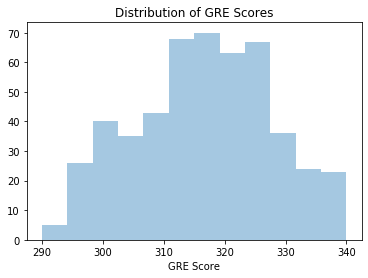

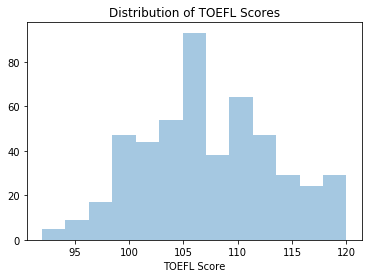

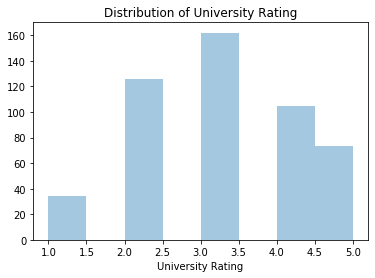

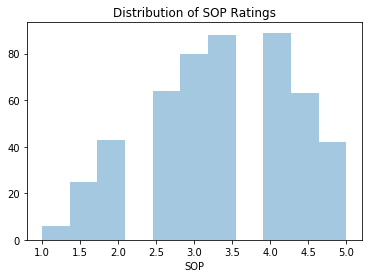

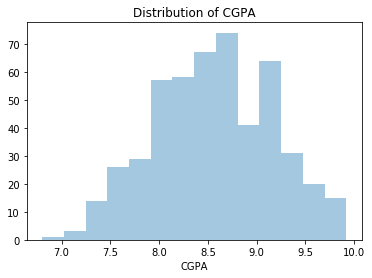

In [5]:
fig = sns.distplot(training_data['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(training_data['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(training_data['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(training_data['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(training_data['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

As expected, all columns follow a bell shaped curve.. if need be we can do further analysis/standardisation with CLM

Now let's take a look at the relations between our columns

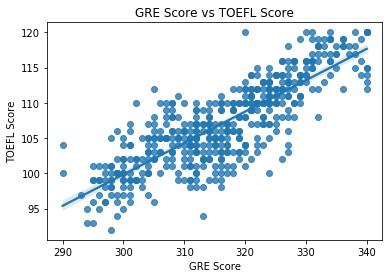

In [6]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=training_data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

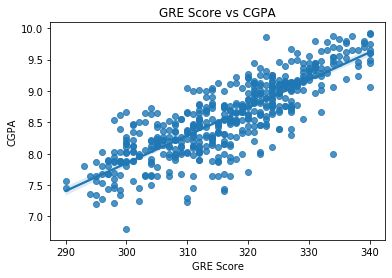

In [7]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=training_data)
plt.title("GRE Score vs CGPA")
plt.show()

In [20]:
training_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


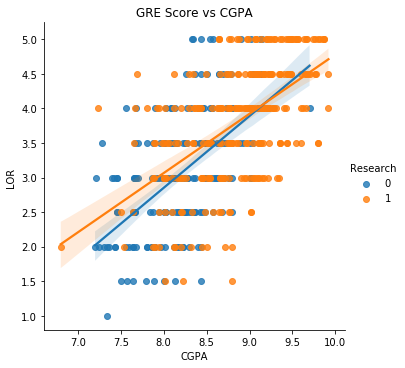

In [8]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=training_data, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

Here we can see LORs are not really related to CGPA so it is clear that a persons LOR is not dependent on a persons academic excellence; as expected since a LORs can be based on human perspective and not objective means.

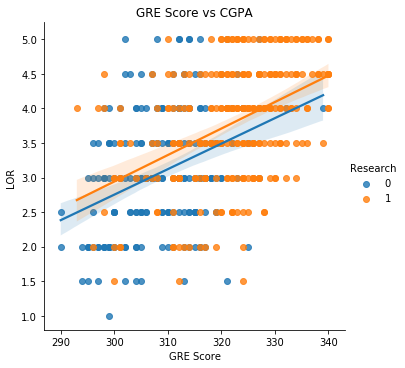

In [9]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=training_data, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related showing that people with different kinds of LORs have all kinds of GRE scores

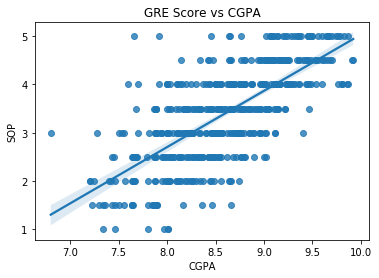

In [10]:
fig = sns.regplot(x="CGPA", y="SOP", data=training_data)
plt.title("GRE Score vs CGPA")
plt.show()

Here we can see that CGPA and SOP are also have little relation because SOP is related to academic performance,however since someone with good CGPA would tend to be more hard working therefore they would have better things to say in their SOP, perhapse explaining the slight shift towards higher CGPA with good SOPs

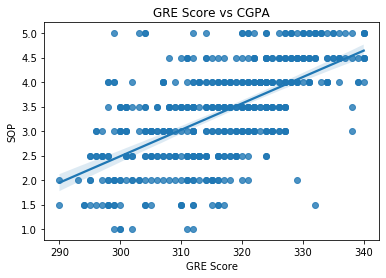

In [11]:
fig = sns.regplot(x="GRE Score", y="SOP", data=training_data)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, the GRE Score and CGPA have a small relation

## Correlation amongst the variables 

Let's have a look at this through a heatmap

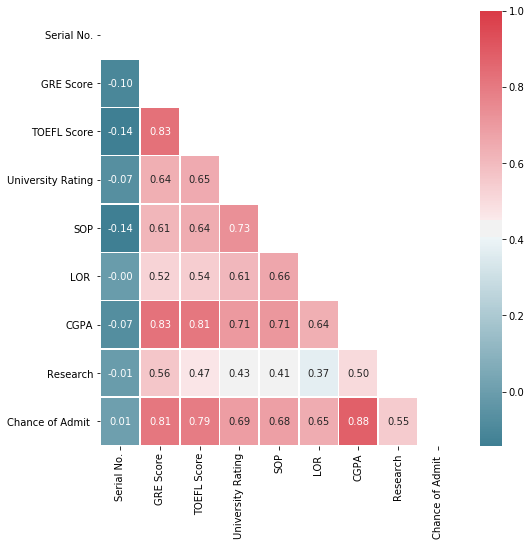

In [13]:
corr = training_data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Looking at the best models

In [14]:
X = training_data.drop(['Chance of Admit '], axis=1)
y = training_data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [15]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

In [16]:
pred=[]
m = []
print("Results...")
for name,model in models:
    model = model
    m.append(name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    pred.append(np.sqrt(mean_squared_error(y_test, predictions)))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 0.08676981041814023
Linear Regression : 0.05783397524904263
RandomForest : 0.05183242517961114
KNeighbours : 0.11716228061966018
SVM : 0.09186782300570517
AdaBoostClassifier : 0.05430747986358783
GradientBoostingClassifier:  0.05006088331597374
Lasso:  0.11488609692905041
Ridge:  0.05831519386729687
BayesianRidge:  0.05917526202773254
ElasticNet:  0.08897598984510355
HuberRegressor:  0.07837045957519498


C:\Users\ssonl\AppData\Local\Continuum\anaconda3\envs\machine-learning\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



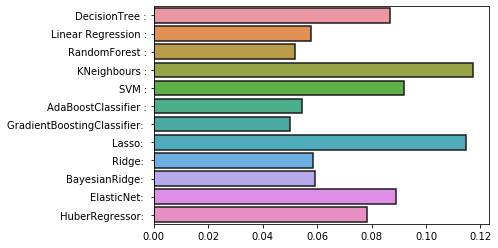

In [17]:
sns.barplot(y=m,x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

Something as simple as Linear Regression performs the best in this case, which proves that complicated models doesnt always mean better results. There are situations when simple models are much better suited

# Looking for importances 

In [18]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

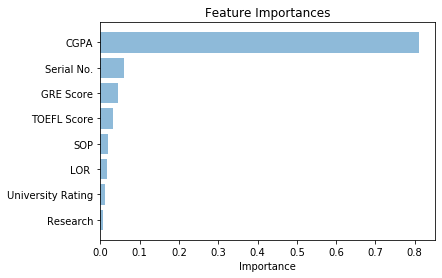

In [19]:
plt.barh([1,2,3,4,5,6,7,8,], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7,8], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Lastly to reinforce our findings, we can see that the CGPA plays the largest role in  graduate admissions followed by GRE Score